# Mengkategorikan negara berdasarkan faktor sosial ekonomi dan kesehatan untuk menentukan perkembangan negara secara keseluruhan menggunakan metode K-Means clustering

# Urutan membuat model K-Means Clustering
1. Membaca dan memahami data
2. Eksplorasi data
	- Analisis univariate
	- Analisis multivariate
3. Persiapan data
	- Penanganan data outlier
    - Scalling data dengan StandardScaler
    - Mengatur proses K-Means dengan k = 3
	- Menentukan jumlah cluster dengan Elbow Method
    - Membuat data frame baru
4. Membuat model K-Means clustering
	- Visualisasi K-Means Clustering dengan data Standarisasi
	- Menghitung nilai shillhouette
	- Mengembalikan nilai StandardScaler ke nilai semula
	- Visualisasi K-Means Clustering dengan data normal
5. Analisa data K-Means Clustering berdasarkan tingkat Kesehatan & GDP percapita
6. Menampilkan urutan rekomendasi negara yang berhak mendapatkan dana bantuan
	- Menggabungkan data hasil clustering ke data semula
	- Menampilkan urutan negara

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv', na_values=['-', 'na'])
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Penjelasan kolom :
    1. Negara : Nama negara
    2. Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
    3. Ekspor : Ekspor barang dan jasa perkapita
    4. Kesehatan: Total pengeluaran kesehatan perkapita
    5. Impor: Impor barang dan jasa perkapita
    6. Pendapatan: Penghasilan bersih perorang
    7. Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
    8. Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
    9. Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
    10. GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

In [3]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- data memiliki 1 kolom object dan 9 kolom numerik
- data memiliki 167 baris dan 10 kolom
- data tidak memiliki kolom null

# Explorasi data

### analisis univariate

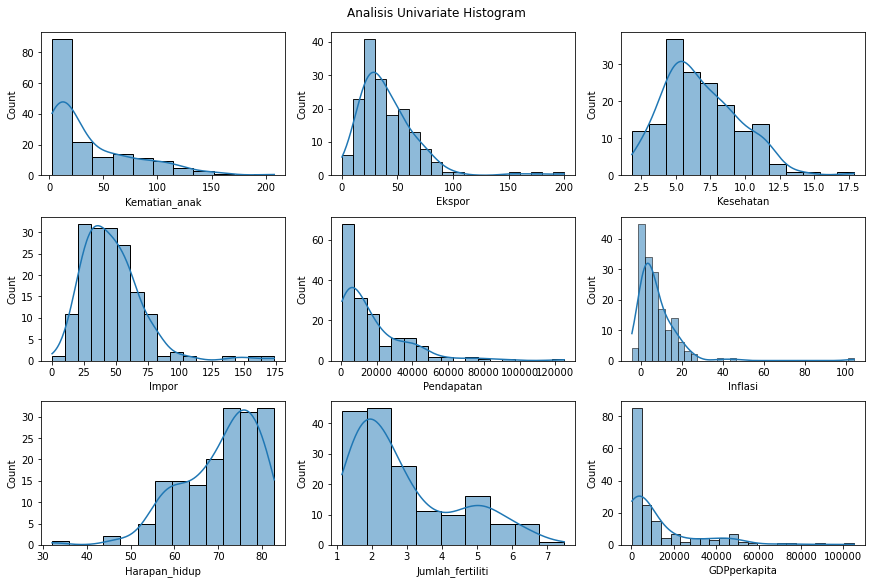

In [5]:
# histplot
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
plt.suptitle("Analisis Univariate Histogram")
ax=ax.flatten()
colhist = df.select_dtypes(exclude='object').columns
for i, j in enumerate(colhist):
    sns.histplot(df[j], ax=ax[i], kde=True)

- jumlah frekuensi data kolom dan ukuran skewness dari masing masing kolom

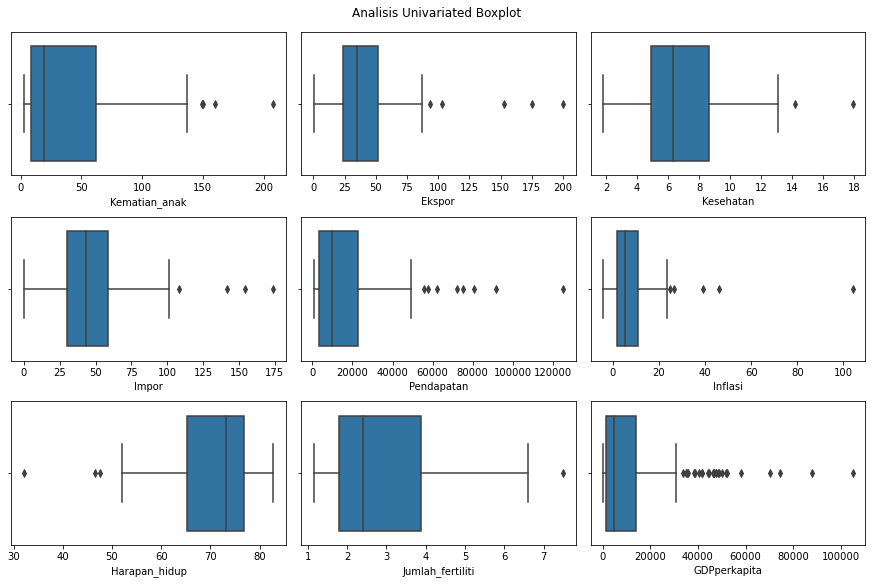

In [6]:
# boxplot
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
plt.suptitle("Analisis Univariated Boxplot")
ax=ax.flatten()
colbox = df.select_dtypes(exclude='object').columns
for i, j in enumerate(colbox):
    sns.boxplot(x=df[j], ax=ax[i])

- kuantil data dari data terendah, Q1, median, Q3, dan data tertinggi beserta nilai outlier dari masing masing kolom

### analisis multivariate

<AxesSubplot:>

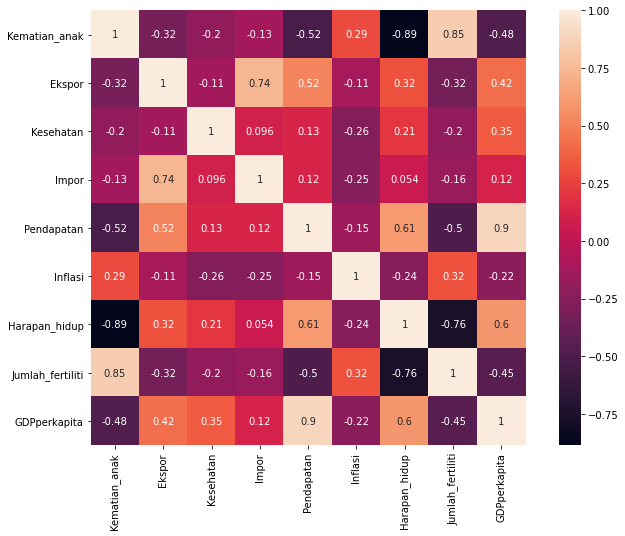

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,square=True)

- berdasarkan korelasi, kolom kesehatan dan GDP perkapita memiliki korelasi yang paling tinggi dan memiliki nilai yang positif

# Preprocessing data

### Penanganan data outlier

In [8]:
# menemukan data outlier
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_find_outlier = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_find_outlier

print(finding_outlier(df['Kesehatan']))
print(finding_outlier(df['GDPperkapita']))

101    14.2
159    17.9
Name: Kesehatan, dtype: float64
7       51900
8       46900
15      44400
23      35300
29      47400
44      58000
53      46200
54      40600
58      41800
68      41900
73      48700
75      35800
77      44500
82      38500
91     105000
110     50300
111     33700
114     87800
123     70300
133     46600
144     52100
145     74600
157     35000
158     38900
159     48400
Name: GDPperkapita, dtype: int64


In [9]:
# hapus data outlier dengan filter
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_remove_outlier = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_remove_outlier

df_out = remove_outlier(df[['Kesehatan', 'GDPperkapita']])
df_out.dropna(axis=0, inplace=True)
df_out

,Kesehatan,GDPperkapita
0,7.58,553.0
1,6.55,4090.0
2,4.17,4460.0
3,2.85,3530.0
4,6.03,12200.0
...,...,...
162,5.25,2970.0
163,4.91,13500.0
164,6.84,1310.0
165,5.18,1310.0


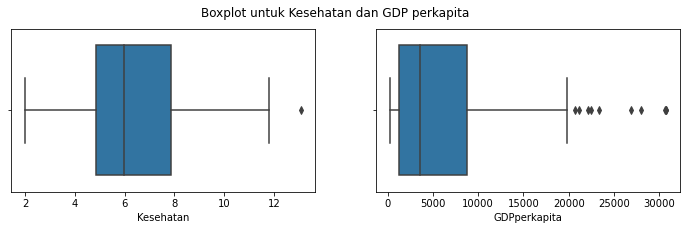

In [10]:
# cek outlier kesehatan dan gdp
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,3))
plt.suptitle("Boxplot untuk Kesehatan dan GDP perkapita")
colout = df_out.columns
for i, j in enumerate(colout):
    sns.boxplot(x=df_out[j], ax=ax[i])

- penanganan outlier hanya diaplikasikan di kolom Kesehatan dan GDPperkapita saja
- penananganan data outlier akan mereduksi data outlier agar data tidak menyimpang terlalu jauh

### Scalling data dengan StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df_out)
df_std

array([[ 5.32116700e-01, -8.18228919e-01],
       [ 7.95822481e-02, -3.20334664e-01],
       [-9.66079883e-01, -2.68250730e-01],
       [-1.54602695e+00, -3.99164402e-01],
       [-1.48881747e-01,  8.21288863e-01],
       [ 7.60580695e-01,  5.53830823e-01],
       [-8.65028500e-01, -4.42802292e-01],
       [-2.14784822e-01, -7.39917325e-02],
       [ 6.68316389e-01,  3.04541361e+00],
       [-6.14596814e-01,  2.01781167e+00],
       [-1.25165988e+00, -7.89371604e-01],
       [ 7.03464696e-01,  1.35620494e+00],
       [-3.33410358e-01, -4.72459286e-02],
       [-5.13545431e-01, -2.85142816e-01],
       [-9.96834651e-01, -7.89371604e-01],
       [-5.13545431e-01, -5.89200377e-01],
       [-6.71712812e-01, -6.17353855e-01],
       [ 2.07864220e+00, -2.47135621e-01],
       [ 8.48451462e-01, -2.20036401e-03],
       [ 1.16039269e+00,  6.80521474e-01],
       [ 2.20175476e-01,  6.67756567e-02],
       [ 1.63059477e-01, -8.15132037e-01],
       [ 2.29831912e+00, -8.63556019e-01],
       [-3.

### Mengatur algoritma K-Means dengan k = 3

In [12]:
from sklearn.cluster import KMeans

# set kmeans n, random, and fit(training dataset)
kmeans_std = KMeans(n_clusters=3, random_state=42).fit(df_std)
# set labels
labels_std = kmeans_std.labels_

### Menentukan jumlah kluster dengan Elbow Method

C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


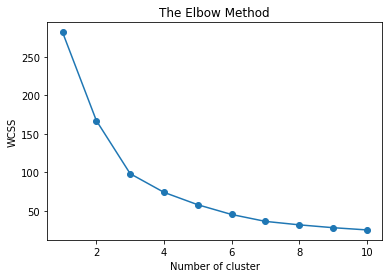

In [13]:
wcss = []

# menentukan jumlah klustering dari 1 - 10 (x)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++').fit(df_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

- Dari data plot Elbow, k=3 adalah kluster yang tepat dalam kasus ini karena jika k<3 maka clustering terlalu sedikit dalam pemetaan target berdasarkan cluster dan jika k>3 maka clustering terlalu banyak dalam pemetaan target berdasarkan cluster

### Menampilkan data frame baru

In [14]:
# membuat ata frame dengan proses scaling dan k-means serta penambahan kolom label
df_kmeans = pd.DataFrame(data=df_std, columns=['Kesehatan', 'GDPperkapita'])
# tambah kolom label
df_kmeans['labels_std'] = labels_std

df_kmeans

,Kesehatan,GDPperkapita,labels_std
0,0.532117,-0.818229,2
1,0.079582,-0.320335,1
2,-0.966080,-0.268251,1
3,-1.546027,-0.399164,1
4,-0.148882,0.821289,0
...,...,...,...
136,-0.491578,-0.477994,1
137,-0.640958,1.004286,0
138,0.206995,-0.711668,1
139,-0.522333,-0.711668,1


# Membuat Model K-Means clustering

### Visualisasi K-Means Clustering

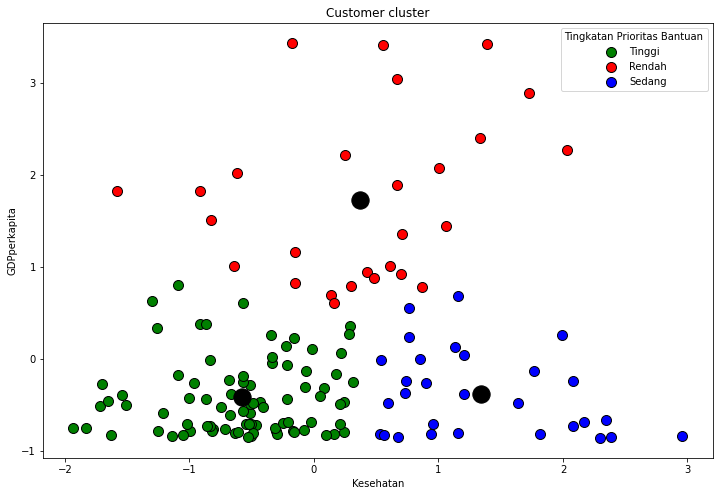

In [15]:
# plotting kmeans menggunakan scatter plot
plt.figure(figsize=(12,8))
plt.scatter(df_kmeans['Kesehatan'][df_kmeans.labels_std == 1], df_kmeans['GDPperkapita'][df_kmeans.labels_std == 1], c='g', s=100, edgecolor='black', label='Tinggi')
plt.scatter(df_kmeans['Kesehatan'][df_kmeans.labels_std == 0], df_kmeans['GDPperkapita'][df_kmeans.labels_std == 0], c='r', s=100, edgecolor='black', label='Rendah')
plt.scatter(df_kmeans['Kesehatan'][df_kmeans.labels_std == 2], df_kmeans['GDPperkapita'][df_kmeans.labels_std == 2], c='b', s=100, edgecolor='black', label='Sedang')


# plotting nilai center
plt.scatter(kmeans_std.cluster_centers_[:,0], kmeans_std.cluster_centers_[:,1], c='black', s=300)

plt.legend().set_title('Tingkatan Prioritas Bantuan')
plt.title('Customer cluster')
plt.xlabel('Kesehatan')
plt.ylabel('GDPperkapita')
plt.show()

- segmentasi negara menggunakan K-Means Clustering berdasarkan nilai Kesehatan dan GDP perkapita

### Nilai shillhouette

In [16]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels=labels_std))

0.47387520548800205


### Mengembalikan nilai StandardScaler ke nilai semula

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels = kmeans.labels_
labels

array([2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2,
       1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 1, 1, 1])

In [18]:
data = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Kesehatan', 'GDPperkapita'])
data['labels'] = labels
data

,Kesehatan,GDPperkapita,labels
0,7.58,553.0,2
1,6.55,4090.0,1
2,4.17,4460.0,1
3,2.85,3530.0,1
4,6.03,12200.0,0
...,...,...,...
136,5.25,2970.0,1
137,4.91,13500.0,0
138,6.84,1310.0,1
139,5.18,1310.0,1


### Memvisualkan data ke model K-Means menggunakan scatterplot dari data normal

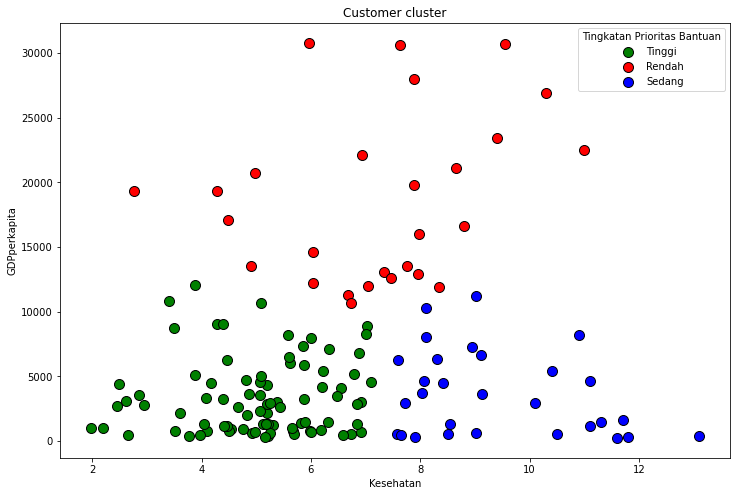

In [19]:
# plotting kmeans menggunakan scatter plot
plt.figure(figsize=(12,8))
plt.scatter(data['Kesehatan'][data.labels == 1], data['GDPperkapita'][data.labels == 1], c='g', s=100, edgecolor='black', label='Tinggi')
plt.scatter(data['Kesehatan'][data.labels == 0], data['GDPperkapita'][data.labels == 0], c='r', s=100, edgecolor='black', label='Rendah')
plt.scatter(data['Kesehatan'][data.labels == 2], data['GDPperkapita'][data.labels == 2], c='b', s=100, edgecolor='black', label='Sedang')

legend  = plt.legend().set_title('Tingkatan Prioritas Bantuan')
plt.title('Customer cluster')
plt.xlabel('Kesehatan')
plt.ylabel('GDPperkapita')
plt.show()

# Analisa data K-Means Clustering berdasarkan tingkat Kesehatan & GDP percapita

berdasarkan data segmentasi K-Means dengan k=3, bisa disimpukan bahwa :

1. cluster merah = adalah cluster dengan jumlah data yang memiliki tingkat Kesehatan yang merata dan memiliki rata rata GDP perkapita yang paling tinggi sehingga clustering ini masuk kedalam tingkatan prioritas bantuan level rendah
2. cluster biru = adalah cluster yang memiliki tingkat Kesehatan yang paling tinggi tetapi memiliki tingkat GDP perkapita yang rendah sehingga cluster ini masuk kedalam tingkatan prioritas bantuan level sedang
3. cluster hijau = adalah cluster yang memiliki tingkat Kesehatan dan GPD perkapita yang paling rendah sehingga cluster ini masuk kedalam tingkatan prioritas bantuan level tinggi

berdasarkan pernyataan diatas, alangkah baiknya Organisasi HELP International menjadikan cluster hijau sebagai target untuk mengalokasikan dana bantuan ke negara negara yang berada di cluster hijau

# Menampilkan urutan rekomendasi negara yang berhak mendapatkan dana bantuan

### Menggabungkan data hasil clustering ke data semula

In [20]:
#summary to main data
df_final = pd.merge(df,data, how='inner')

df_final['labels'] = df_final['labels'].astype('object')
df_final = df_final.rename({'labels' : 'Cluster'}, axis=1)
df_final

C:\Users\Laptop\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1151: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
4,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
...,...,...,...,...,...,...,...,...,...,...,...
130,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
131,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
132,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
133,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [21]:
df_sort = df_final[df_final['Cluster']==1]
df_sort = df_sort.sort_values(by=['Kesehatan'],ascending=True)[:10]
df_sort

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
91,Pakistan,92.1,13.50,2.20,19.4,4280,10.90,65.3,3.85,1040,1
125,Turkmenistan,62.0,76.30,2.50,44.5,9940,2.31,67.9,2.83,4440,1
57,Indonesia,33.3,24.30,2.61,22.4,8430,15.30,69.9,2.48,3110,1
41,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1
113,Sri Lanka,11.2,19.60,2.94,26.8,8560,22.80,74.4,2.20,2810,1
105,Seychelles,14.4,93.80,3.40,108.0,20400,-4.21,73.4,2.17,10800,1
44,Gabon,63.7,57.70,3.50,18.9,15400,16.60,62.9,4.08,8750,1
9,Bangladesh,49.4,16.00,3.52,21.8,2440,7.14,70.4,2.33,758,1
95,Philippines,31.9,34.80,3.61,36.6,5600,4.22,69.0,3.16,2130,1
75,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1


- menggabungkan data kmeans dengan data semula dengan inner join agar data data yang missing terhapus secara automatis atau yang memiliki kesamaan saja yang terfilter

### Menampilkan urutan negara

In [22]:
list_negara = df_final.loc[df_final['Cluster']==1]['Negara'].to_list()
list_negara

['Albania',
 'Algeria',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Chad',
 'China',
 'Comoros',
 "Cote d'Ivoire",
 'Dominican Republic',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Kazakhstan',
 'Kenya',
 'Kyrgyz Republic',
 'Lao',
 'Lebanon',
 'Libya',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Niger',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Philippines',
 'Romania',
 'Russia',
 'Samoa',
 'Senegal',
 'Seychelles',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Sudan',
 'Suriname',
 'Tajikistan',
 'Tanzania',
 'Thailand',
 'Tonga',
 'Tunisia',
 'Turkmenistan',
 'Uzbekistan',
 'Vanuatu',
 'Vietnam',
 'Yemen',

- list dari data negara yang memerlukan bantuan